## Introduction to Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
al = pd.read_csv('https://assets.datacamp.com/production/repositories/469/datasets/8fb59b9a99957c3b9b1c82b623aea54d8ccbcd9f/2008_all_states.csv')

In [7]:
a = pd.read_csv('https://assets.datacamp.com/production/repositories/469/datasets/e079fddb581197780e1a7b7af2aeeff7242535f0/2008_swing_states.csv')
a.head(3)

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07


#### Plotting a histogram

Text(0, 0.5, 'Number of counties')

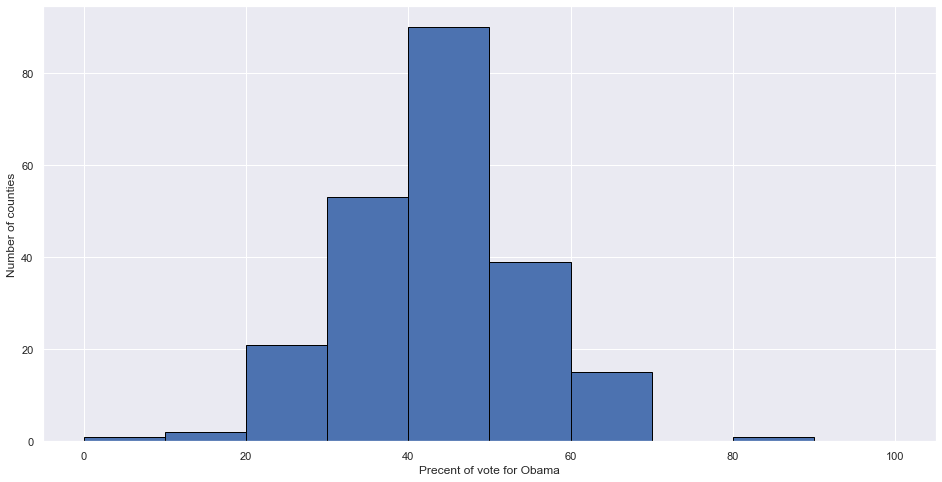

In [68]:
bin = [0,10,20,30,40,50,60,70,80,90,100]

plt.figure(figsize=(16, 8))
plt.hist(a['dem_share'], edgecolor = 'black', bins = bin)
plt.xlabel('Precent of vote for Obama')
plt.ylabel('Number of counties')

Text(0, 0.5, 'Number of counties')

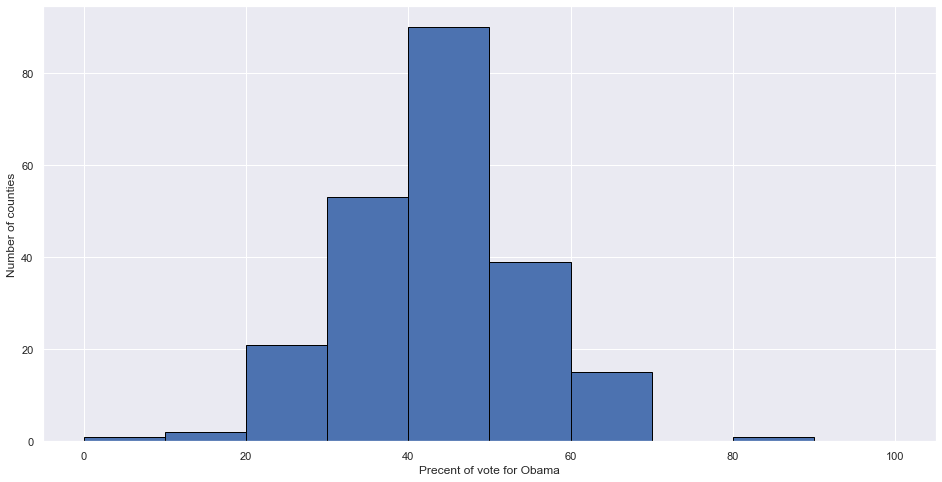

In [69]:
sns.set()
plt.figure(figsize=(16, 8))
plt.hist(a['dem_share'], edgecolor = 'black', bins = bin)
plt.xlabel('Precent of vote for Obama')
plt.ylabel('Number of counties')

#### Plot all of your data: Bee swarm plots

Text(0, 0.5, 'Procent of vote for Obama')

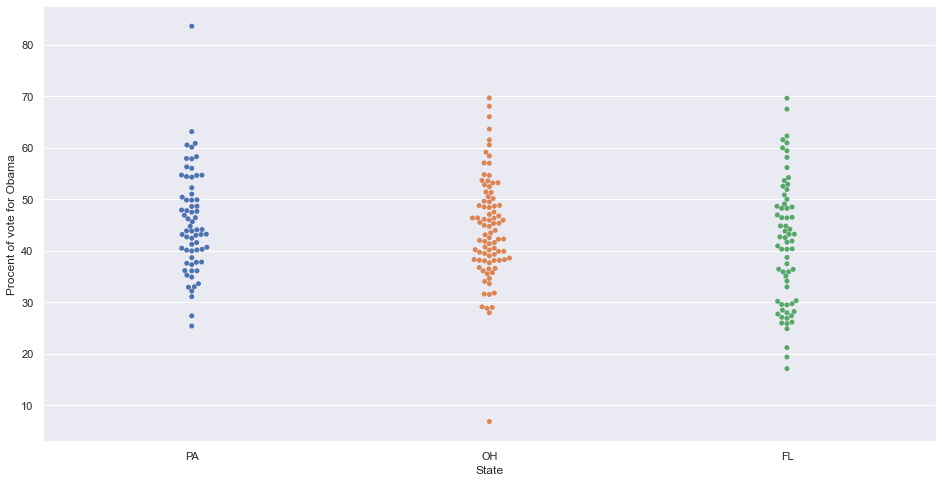

In [71]:
plt.figure(figsize=(16, 8))
sns.swarmplot(x='state', y='dem_share', data=a)
plt.xlabel('State')
plt.ylabel('Procent of vote for Obama')

#### ECDFs (Dystrybuanta)

In [14]:
x = np.sort(a['dem_share'])
y = np.arange(1, len(x)+ 1 / len(x))

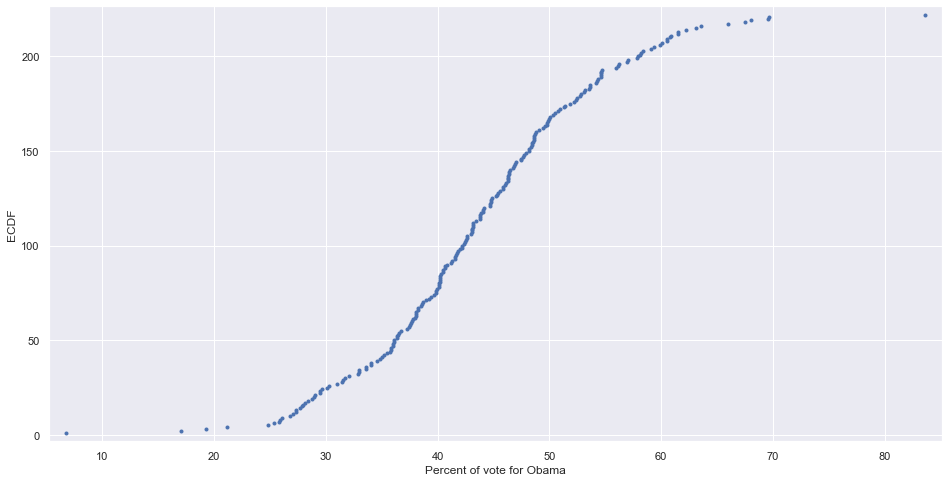

In [72]:
plt.figure(figsize=(16, 8))
plt.plot(x,y, marker='.', linestyle='none')
plt.xlabel('Percent of vote for Obama')
plt.ylabel('ECDF')
plt.margins(0.02)

## Quantitative Exploratory Data Analysis

### Summary statistics

#### Percentiles, outliers, and box plots

In [16]:
np.percentile(a['dem_share'], [25, 50, 75])

array([37.3025, 43.185 , 49.925 ])

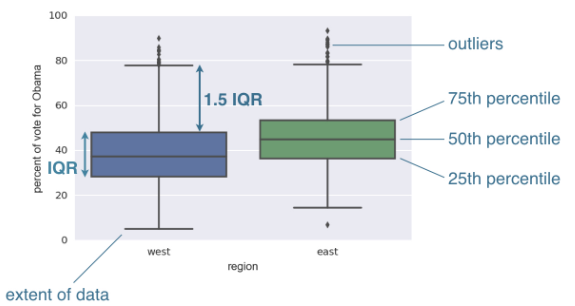

In [17]:
all.head(3)

,state,county,total_votes,dem_votes,rep_votes,other_votes,dem_share,east_west
0,AK,"State House District 8, Denali-University",10320,4995,4983,342,50.06,west
1,AK,"State House District 37, Bristol Bay-Aleuti",4665,1868,2661,136,41.24,west
2,AK,"State House District 12, Richardson-Glenn H",7589,1914,5467,208,25.93,west


Text(0, 0.5, 'Percent of vote for Obama')

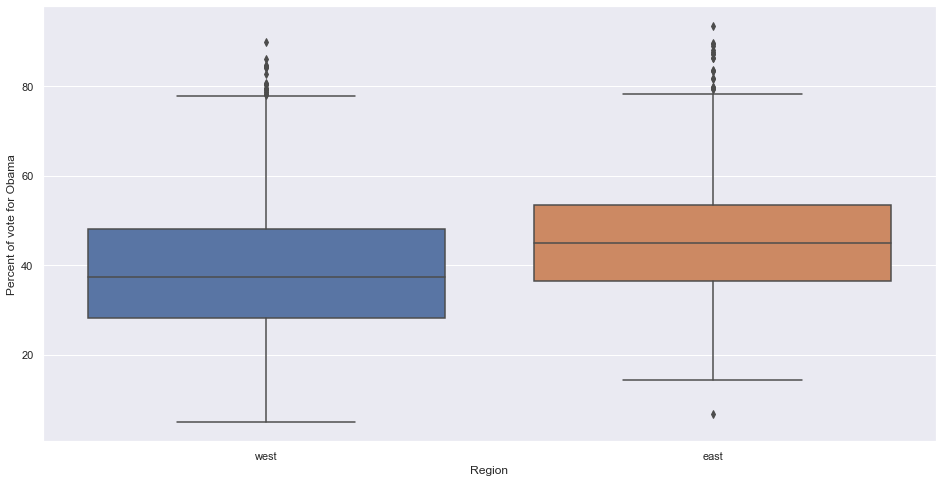

In [73]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='east_west', y = 'dem_share', data=all)
plt.xlabel('Region')
plt.ylabel('Percent of vote for Obama')

#### Variance and standard deviation

In [19]:
np.var(a[a['state'] == 'FL']['dem_share'])

147.44278618846064

In [20]:
np.std(a[a['state'] == 'FL']['dem_share'])

12.142602117687158

#### Covariance and the Pearson correlation coefficient

<AxesSubplot:xlabel='total_votes', ylabel='dem_share'>

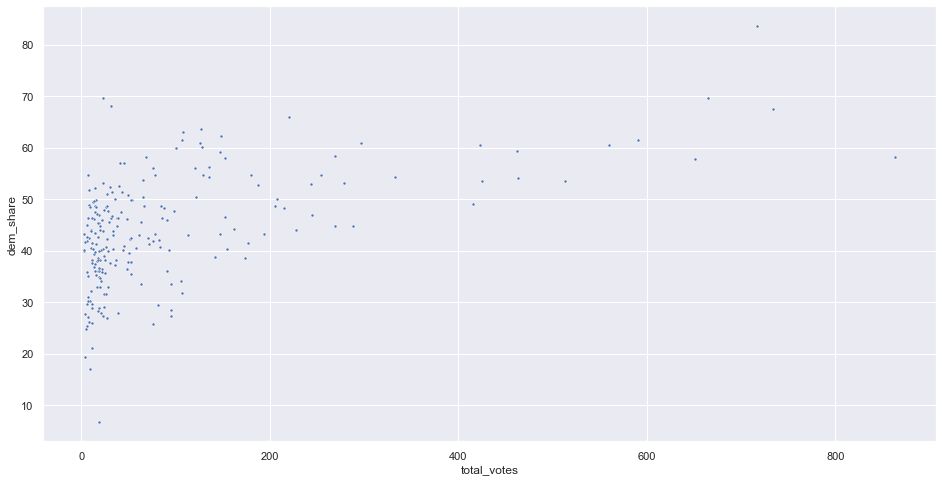

In [74]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x=a['total_votes']/1000, y='dem_share', marker='.', data=a)

**Covariance** is a statistical measure that describes the relationship between two random variables. It can be interpreted as a way in which two variables change together. The covariance between two random variables, X and Y, is defined as the expected value of the product of the deviation of X from its expected value and the deviation of Y from its expected value.

**Covariance** can take on negative, zero, or positive values, reflecting different types of relationships between variables. Positive covariance indicates that two variables tend to increase or decrease their values together. Negative covariance means that variables tend to change values in opposite directions. Zero covariance means that two variables have no linear relationship.

<br>

### Random number generators and hacker statistics

#### Simulating 4 coin flips

In [45]:
rng = np.random.default_rng(42)

random_numbers = rng.random(size=4)
random_numbers

array([0.77395605, 0.43887844, 0.85859792, 0.69736803])

In [50]:
heads = random_numbers < 0.5
heads

array([False,  True, False, False])

In [51]:
np.sum(heads)

1

In [53]:
n_all_heads = 0 # Initialize number of 4-heads trials
for _ in range(10000):
    heads = np.random.random(size=4) < 0.5
    n_heads = np.sum(heads)
    if n_heads == 4:
        n_all_heads += 1

n_all_heads / 10000

0.0636

The probability of flipping 4 heads is 0.0636

### Iris dataset

In [22]:
iris = sns.load_dataset('iris')
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [37]:
versicolor_petal_length = iris[iris['species'] == 'versicolor']['petal_length']
setosa_petal_length = iris[iris['species'] == 'setosa']['petal_length']
virginica_petal_length = iris[iris['species'] == 'virginica']['petal_length']

versicolor_petal_width = iris[iris['species'] == 'versicolor']['petal_width']

(array([ 1.,  4.,  2.,  9.,  9., 11., 10.,  4.]),
 array([3.    , 3.2625, 3.525 , 3.7875, 4.05  , 4.3125, 4.575 , 4.8375,
        5.1   ]),
 <BarContainer object of 8 artists>)

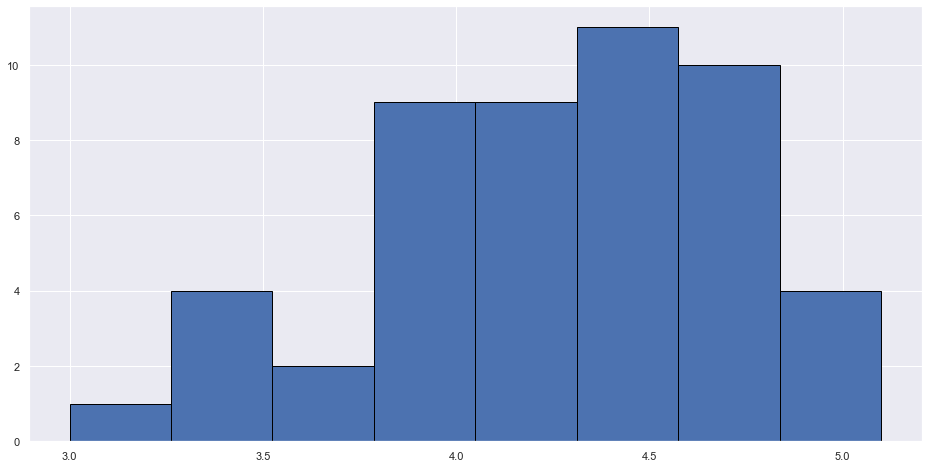

In [75]:
plt.figure(figsize=(16, 8))
plt.hist(versicolor_petal_length, edgecolor='black', bins=8)

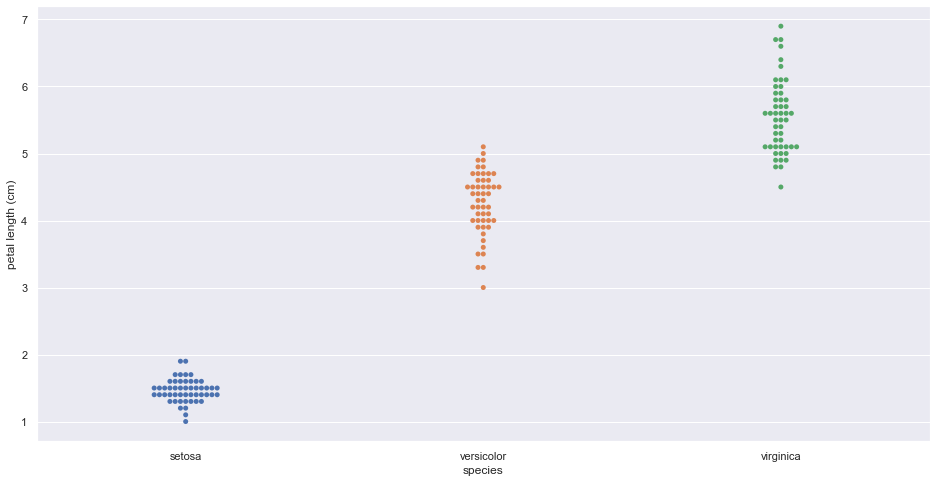

In [76]:
plt.figure(figsize=(16, 8))

# Create bee swarm plot with Seaborn's default settings
sns.swarmplot(data = iris, x='species', y='petal_length')

# Label the axes
plt.xlabel('species')
plt.ylabel('petal length (cm)')

# Show the plot
plt.show()

In [26]:
# Tworzenie dunkcji
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

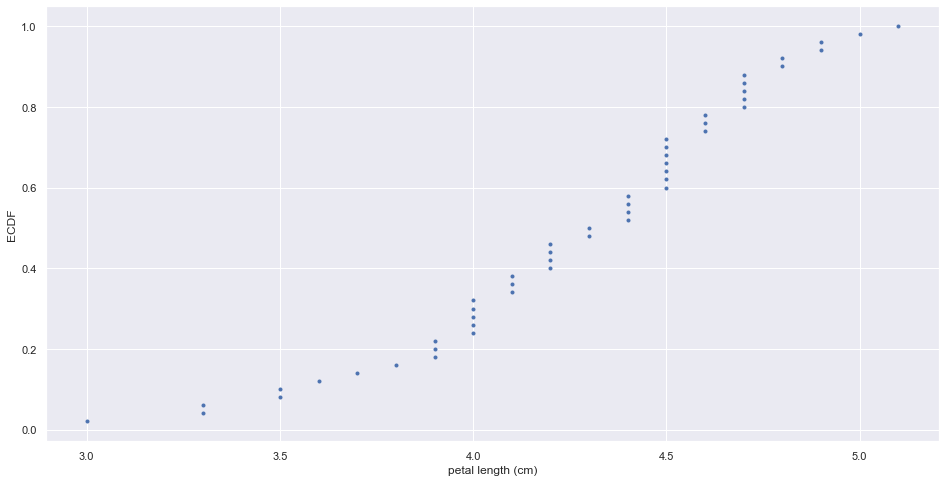

In [77]:
plt.figure(figsize=(16, 8))

# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
plt.plot(x_vers, y_vers, marker='.', linestyle='none')

# Label the axes
plt.xlabel('petal length (cm)')
plt.ylabel('ECDF')

# Display the plot
plt.show()

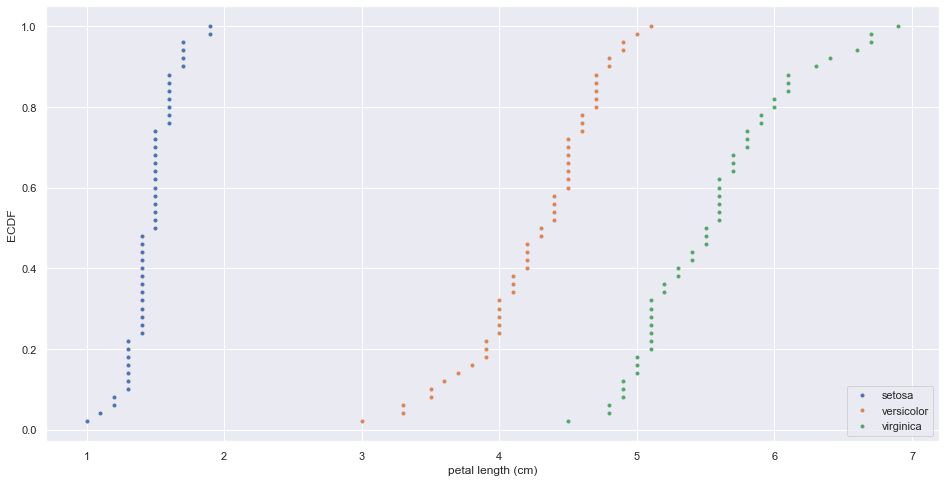

In [78]:
sns.set()
# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot
plt.figure(figsize=(16, 8))
_ = plt.plot(x_set, y_set, marker='.', linestyle='none')
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')
_ = plt.plot(x_virg, y_virg, marker='.', linestyle='none')



# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

<br>

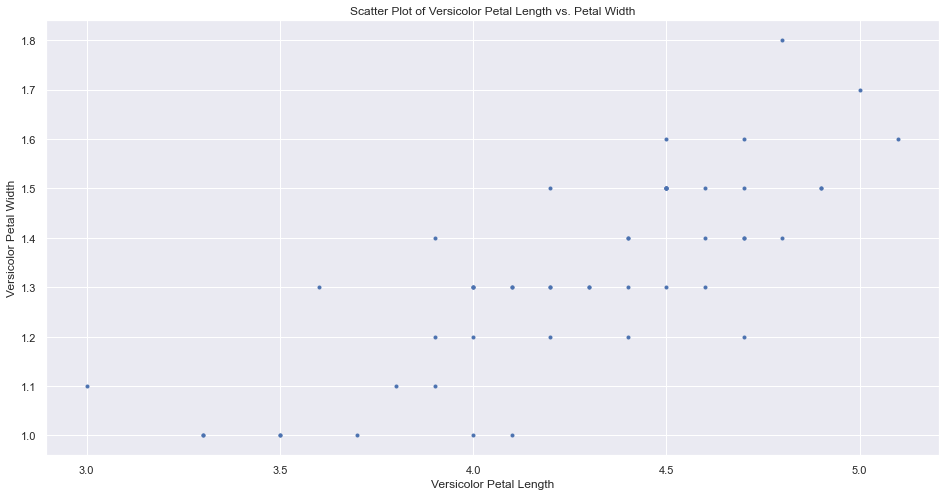

In [79]:
# Make a scatter plot
plt.figure(figsize=(16, 8))
plt.plot(versicolor_petal_length, versicolor_petal_width, marker='.', linestyle='none')


# Label the axes
plt.xlabel('Versicolor Petal Length')
plt.ylabel('Versicolor Petal Width')
plt.title('Scatter Plot of Versicolor Petal Length vs. Petal Width')


# Show the result
plt.show()

In [41]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
print("Covariance Matrix:")
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0,1]

# Print the length/width covariance
print("Covariance between Petal Length and Petal Width:")
print(petal_cov)

Covariance Matrix:
[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
Covariance between Petal Length and Petal Width:
0.07310204081632653


In [42]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor
r = pearson_r(versicolor_petal_width, versicolor_petal_length)

# Print the result
print(r)

0.7866680885228168


#### Summary statistics

In [29]:
# Compute the mean: mean_length_vers
mean_length_vers = np.mean(versicolor_petal_length)

# Print the result with some nice formatting
print('I. versicolor:', mean_length_vers, 'cm')

I. versicolor: 4.26 cm


In [30]:
# Percentiles
np.percentile(versicolor_petal_length, [2.5, 25, 50, 75, 97.5])

array([3.3   , 4.    , 4.35  , 4.6   , 4.9775])

NameError: name 'ptiles_vers' is not defined

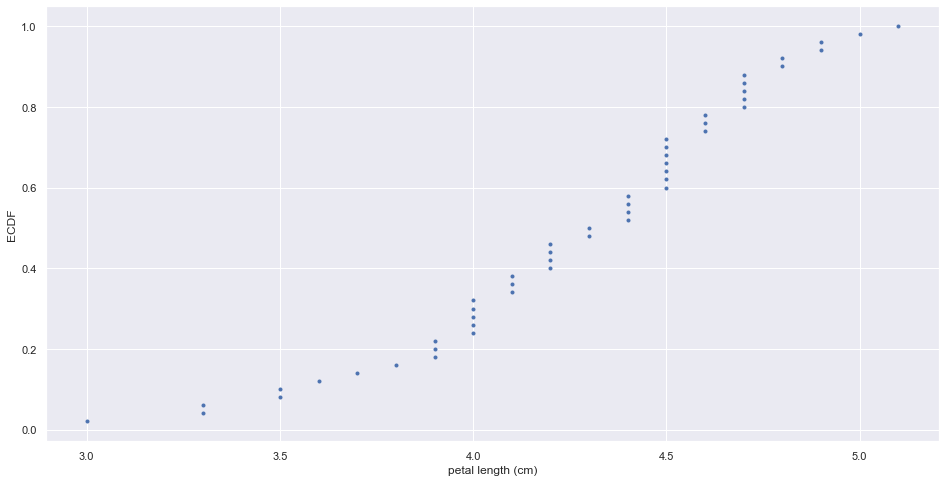

In [80]:
# Plot the ECDF
plt.figure(figsize=(16, 8))
plt.plot(x_vers, y_vers, '.')
plt.xlabel('petal length (cm)')
plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()

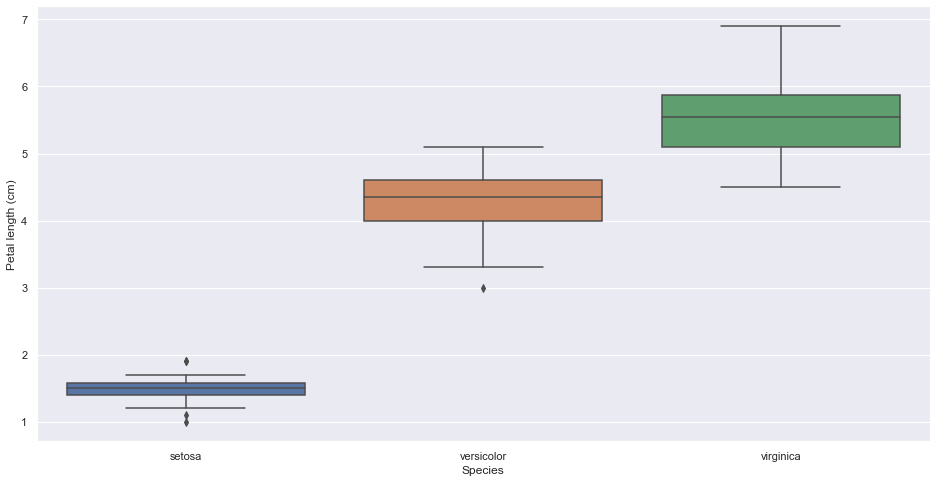

In [81]:
# Create box plot with Seaborn's default settings
plt.figure(figsize=(16, 8))
sns.boxplot(x='species', y='petal_length', data=iris)

# Label the axes
plt.xlabel('Species')
plt.ylabel('Petal length (cm)')

# Show the plot
plt.show()


In [33]:
# Compute the variance: variance
variance = np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(np.std(versicolor_petal_length))

0.4651881339845204
0.4651881339845204


<br>

## Thinking Probabilistically-- Discrete Variables

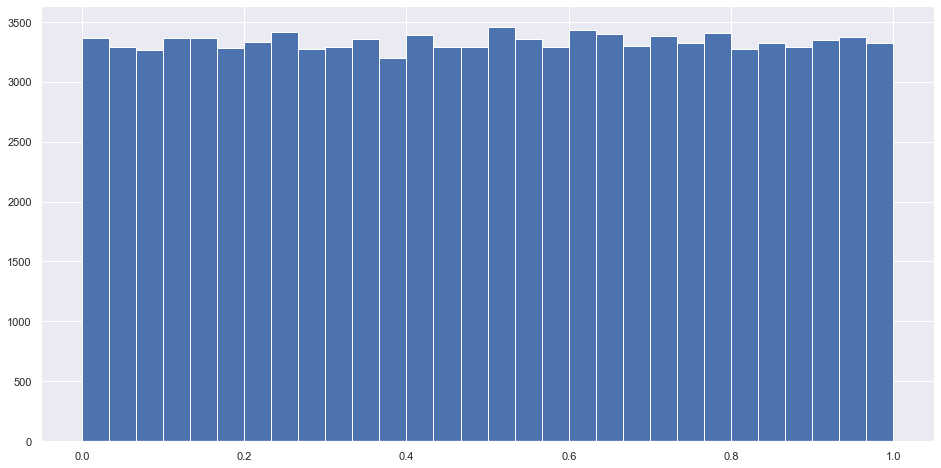

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Instantiate and seed the random number generator
rng = np.random.default_rng(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = rng.random()

# Plot a histogram
plt.figure(figsize=(16, 8))
_ = plt.hist(random_numbers, bins=30)

# Show the plot
plt.show()

In [62]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = rng.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

In [63]:
n_successes

24

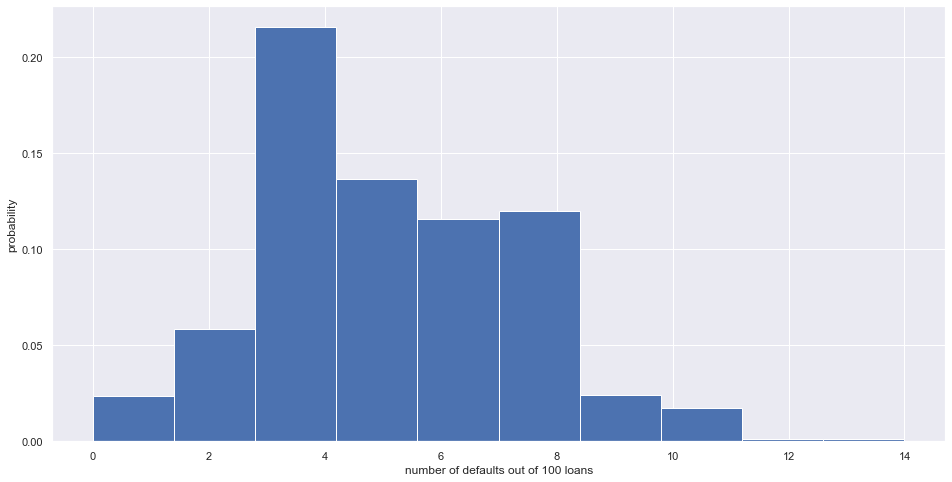

In [82]:
# Instantiate and seed random number generator
rng = np.random.default_rng(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)

# Plot the histogram with default number of bins; label your axes
plt.figure(figsize=(16, 8))
_ = plt.hist(n_defaults, density=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

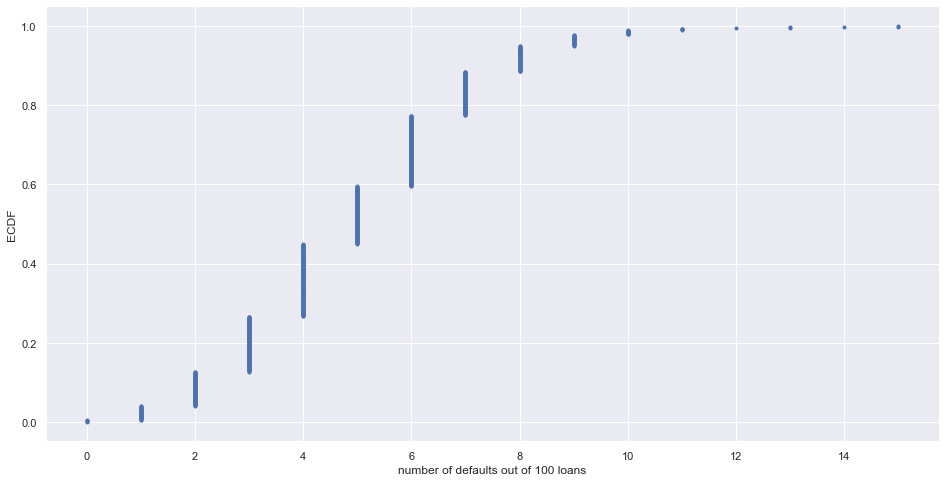

Probability of losing money = 0.022


In [84]:
import numpy as np
import matplotlib.pyplot as plt

# Seed the random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Define the perform_bernoulli_trials function
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return the number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

# Compute the number of defaults for 1000 simulations
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)

# Define ECDF function
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n
    return x, y

# Compute ECDF: x, y
x, y = ecdf(n_defaults)

# Plot the ECDF with labeled axes
plt.figure(figsize=(16,8))
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))


<br>

#### Probability distributions and stories: The Binomial distribution

In [89]:
# Sampling from the Binomial distribution

print(rng.binomial(4, 0.5))

print(rng.binomial(4, 0.5, size = 10))

2
[1 2 1 0 3 2 1 2 1 3]


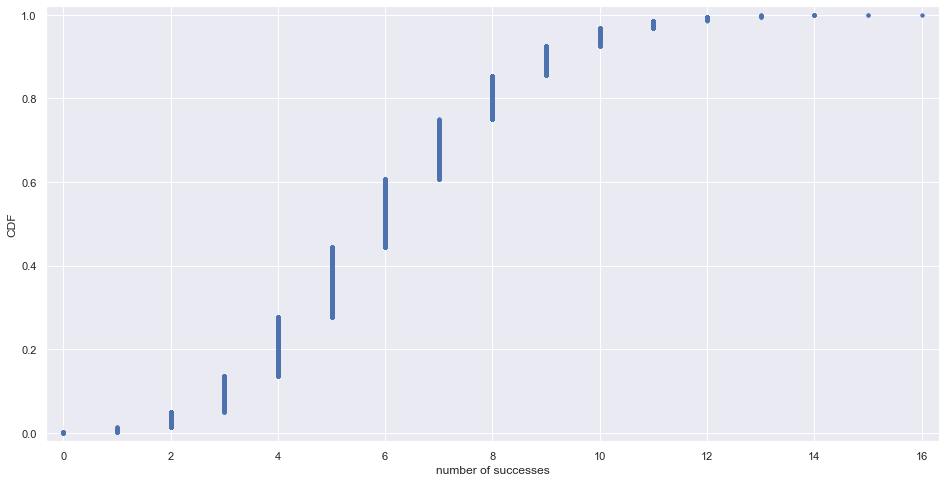

In [98]:
n = 60
p = 0.1
size = 10000

samples = rng.binomial(n, p, size)

x, y = ecdf(samples)

plt.figure(figsize=(16,8))
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('number of successes')
_ = plt.ylabel('CDF')

plt.show()

<br>

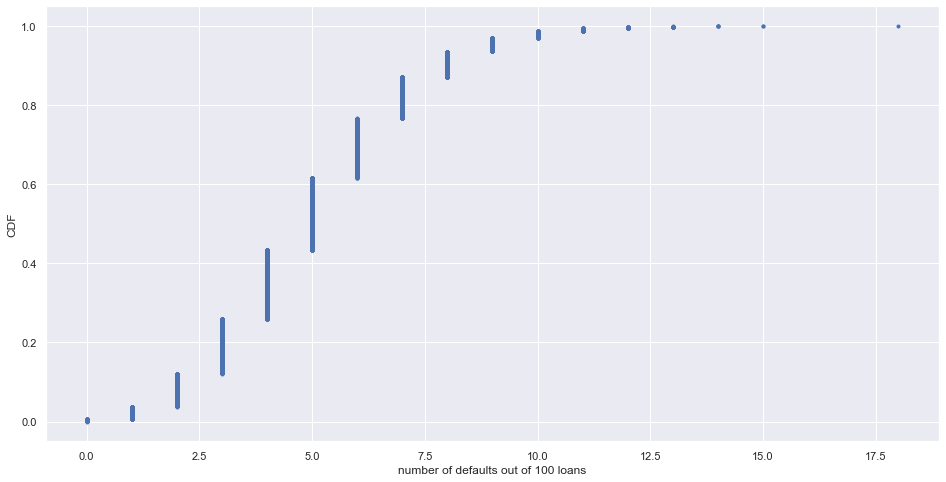

In [100]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = rng.binomial(n=100, p=0.05, size=10000)

# Compute CDF: x, y
x, y = ecdf(n_defaults)

# Plot the CDF with axis labels
plt.figure(figsize=(16,8))
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('CDF')

# Show the plot
plt.show()

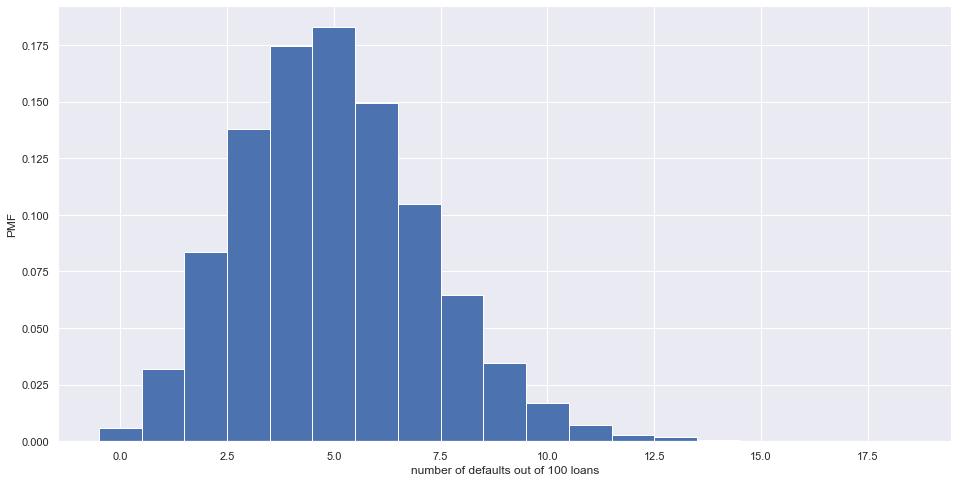

In [102]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
plt.figure(figsize=(16,8))
_ = plt.hist(n_defaults, density=True, bins=bins)

# Label axes
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('PMF')

# Show the plot
plt.show()

<br>

#### Poisson processes and the Poisson distribution

**Poisson distribution**

* The number r of arrivals of a Poisson process in a given time
interval with average rate of lambda arrivals per interval is
Poisson distributed.

* The number r of hits on a website in one hour with an
average hit rate of 6 hits per hour is Poisson distributed.

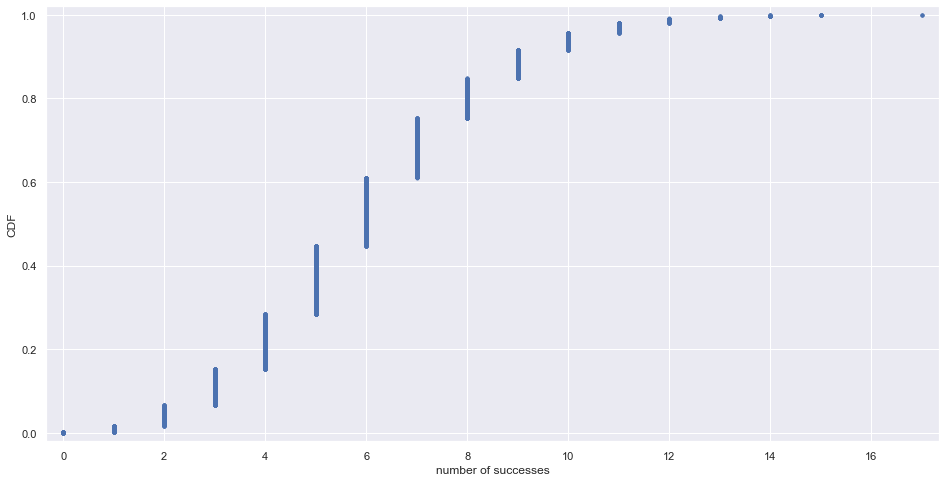

In [105]:
samp = rng.poisson(6, size=10000)

x, y = ecdf(samp)

plt.figure(figsize=(16,8))
_ = plt.plot(x, y, marker = '.', linestyle = 'none')
plt.margins(0.02)
_ = plt.xlabel('number of successes')
_ = plt.ylabel('CDF')
plt.show()

In [106]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = rng.poisson(10, size=10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = rng.binomial(n[i], p[i], size=10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))

Poisson:      9.9876 3.1353542447385427
n = 20 Binom: 10.0062 2.2375793974739757
n = 100 Binom: 9.9708 3.016214077282977
n = 1000 Binom: 9.9792 3.1346718105728386


In [107]:
# Parameters for the Poisson distribution
mean = 251/115
num_samples = 10000

# Draw 10,000 samples from a Poisson distribution with the given mean
n_nohitters = rng.poisson(mean, num_samples)

# Compute the number of samples that are seven or greater
n_large = np.sum(n_nohitters >= 7)

# Compute the probability of getting seven or more no-hitters
p_large = n_large / num_samples

# Print the result
print('Probability of seven or more no-hitters:', p_large)

Probability of seven or more no-hitters: 0.0063


<br>

## Thinking Probabilistically-- Continuous Variables

#### Introduction to the Normal distribution

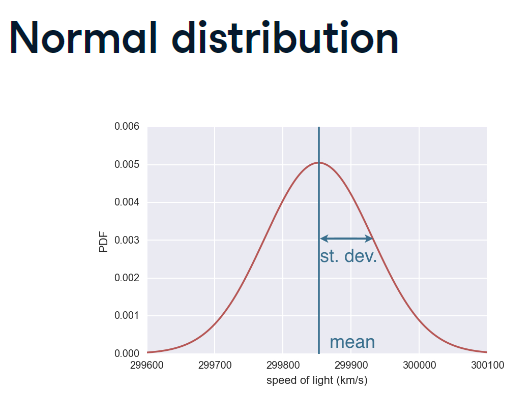

In [111]:
michelson_speed_of_light = pd.read_csv(r'https://assets.datacamp.com/production/repositories/469/datasets/df23780d215774ff90be0ea93e53f4fb5ebbade8/michelson_speed_of_light.csv')
michelson_speed_of_light.head(3)

,Unnamed: 0,date,distinctness of image,temperature (F),position of deflected image,position of slit,displacement of image in divisions,difference between greatest and least,B,Cor,revolutions per second,radius (ft),value of one turn of screw,velocity of light in air (km/s),remarks
0,0,June 5,3,76,114.85,0.300,114.55,0.17,1.423,-0.132,257.36,28.672,0.99614,299850,Electric light.
1,1,June 7,2,72,114.64,0.074,114.56,0.10,1.533,-0.084,257.52,28.655,0.99614,299740,P.M. Frame inclined at various angles
2,2,June 7,2,72,114.58,0.074,114.50,0.08,1.533,-0.084,257.52,28.647,0.99614,299900,P.M. Frame inclined at various angles


In [117]:
michelson_data = michelson_speed_of_light['velocity of light in air (km/s)'].astype(float)

mean = np.mean(michelson_data)
std = np.std(michelson_data)

rng = np.random.default_rng()
sam = rng.normal(mean, std, size=10000)

x, y = ecdf(michelson_data)
x_theor, y_theor = ecdf(sam)

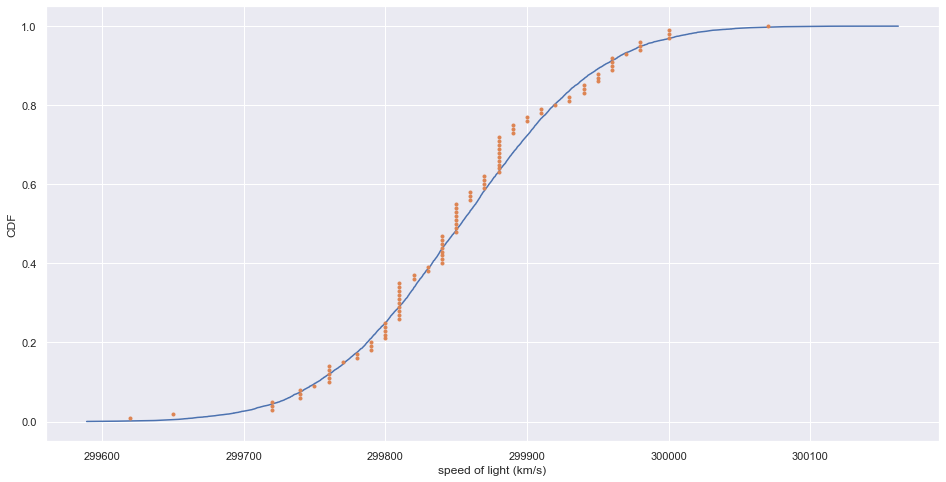

In [121]:
plt.figure(figsize=(16,8))
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('speed of light (km/s)')
plt.ylabel('CDF')

plt. show()

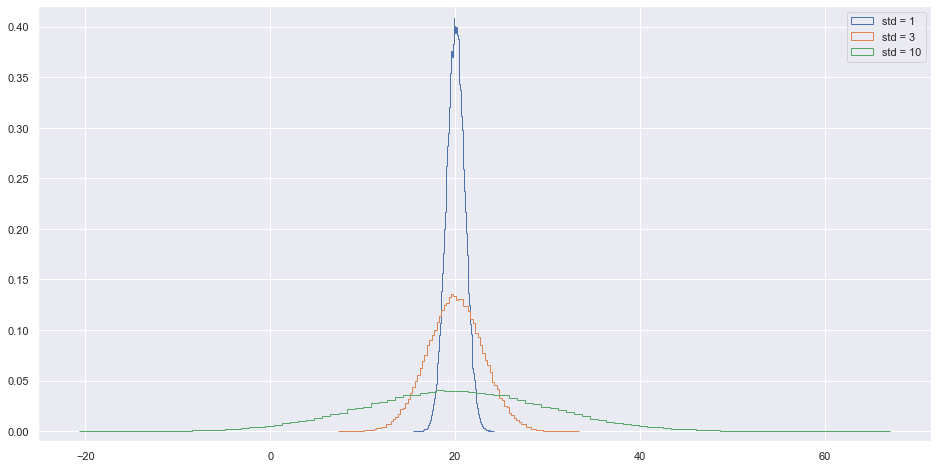

In [123]:
# Set the random seed for reproducibility
np.random.seed(42)

# Parameters
mean = 20
size = 100000

# Draw samples from Normal distributions with different standard deviations
samples_std1 = rng.normal(mean, 1, size)
samples_std3 = rng.normal(mean, 3, size)
samples_std10 = rng.normal(mean, 10, size)

# Make histograms with 100 bins and density=True
plt.figure(figsize=(16,8))
plt.hist(samples_std1, bins=100, density=True, histtype='step')
plt.hist(samples_std3, bins=100, density=True, histtype='step')
plt.hist(samples_std10, bins=100, density=True, histtype='step')

# Make a legend
plt.legend(('std = 1', 'std = 3', 'std = 10'))

# Set y-axis limits and show the plot
plt.ylim(-0.01, 0.42)
plt.show()

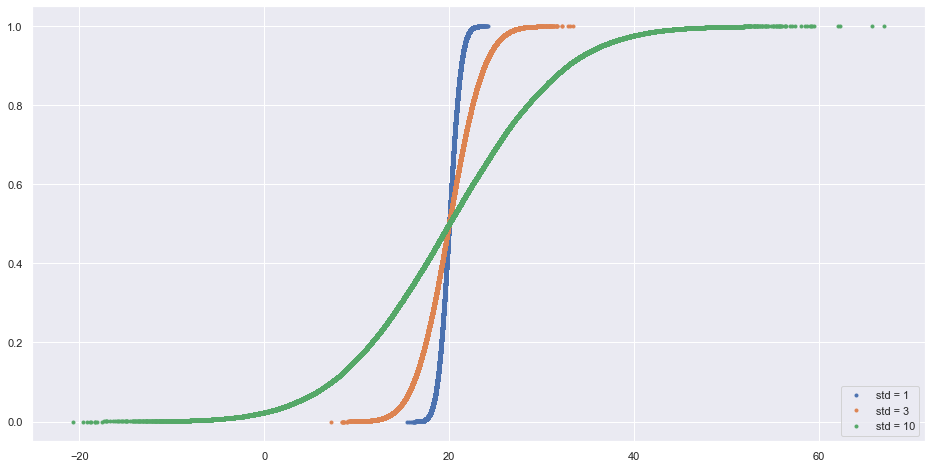

In [125]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ecdf() function
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    return x, y

# Generate CDFs for each set of samples
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs as dots with markers and linestyle
plt.figure(figsize=(16,8))
plt.plot(x_std1, y_std1, marker='.', linestyle='none')
plt.plot(x_std3, y_std3, marker='.', linestyle='none')
plt.plot(x_std10, y_std10, marker='.', linestyle='none')

# Make a legend
plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')

# Show the plot
plt.show()


<br>

#### The Normal distribution: Properties and warnings

In [138]:
belmont_no_outliers = pd.read_csv(r'https://assets.datacamp.com/production/repositories/469/datasets/7507bfed990379f246b4f166ea8a57ecf31c6c9d/belmont.csv')
belmont_no_outliers.head(3)

,Year,Winner,Jockey,Trainer,Owner,Time,Track,miles
0,2016,Creator,"Irad Ortiz, Jr",Steve Asmussen,WinStar Farm LLC,2:28.51,Belmont,1.5
1,2015,American Pharoah,Victor Espinoza,Bob Baffert,"Zayat Stables, LLC",2:26.65,Belmont,1.5
2,2014,Tonalist,Joel Rosario,Christophe Clement,Robert S. Evans,2:28.52,Belmont,1.5


In [139]:
def time_to_seconds(time_str):
    minutes, rest = time_str.split(':')
    seconds, milliseconds = rest.split('.')
    total_seconds = int(minutes) * 60 + int(seconds) + float(milliseconds) / 1000.0
    return total_seconds

belmont_no_outliers['Time'] = belmont_no_outliers['Time'].apply(time_to_seconds)

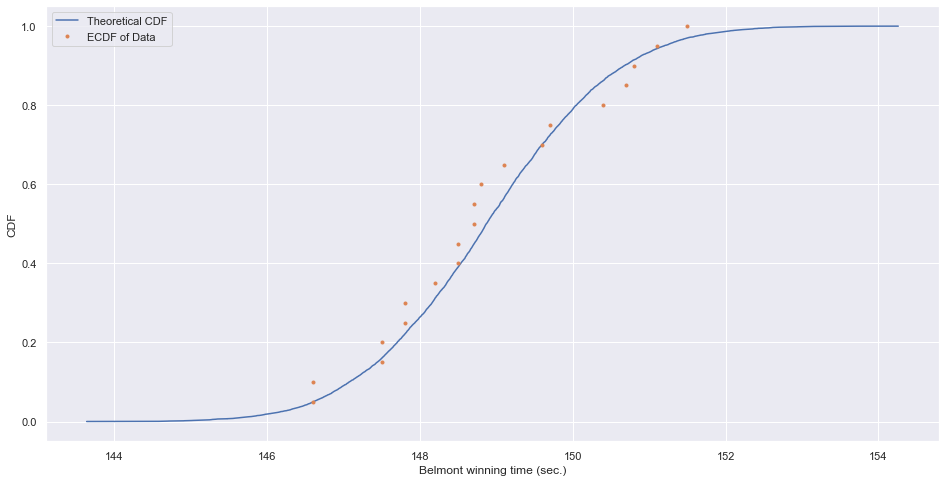

In [143]:
# Compute mean and standard deviation
mu = np.mean(time_values)
sigma = np.std(time_values)

# Sample out of a normal distribution with this mu and sigma
np.random.seed(0)  # For reproducibility
s = np.random.normal(mu, sigma, size=10000)

# Get the CDF of the samples and of the data
x_theor = np.sort(s)
y_theor = np.arange(1, len(x_theor) + 1) / len(x_theor)

x = np.sort(time_values)
y = np.arange(1, len(x) + 1) / len(x)

# Plot the CDFs and show the plot
plt.figure(figsize=(16,8))
plt.plot(x_theor, y_theor, label='Theoretical CDF')
plt.plot(x, y, marker='.', linestyle='none', label='ECDF of Data')
plt.xlabel('Belmont winning time (sec.)')
plt.ylabel('CDF')
plt.legend()
plt.show()

In [142]:
# Take a million samples out of the Normal distribution: samples
samples1 = rng.normal(mu, sigma, size=1000000)

# Compute the fraction that are <= 144 seconds: prob
prob = np.sum(samples1 <= 144) / len(samples1)

# Print the result
print('Probability of besting Secretariat:', prob)

Probability of besting Secretariat: 0.000266


<br>

#### The Exponential distribution

In [145]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = rng.exponential(tau1, size=size)

    # Draw samples out of second exponential distribution: t2
    t2 = rng.exponential(tau2, size=size)

    return t1 + t2

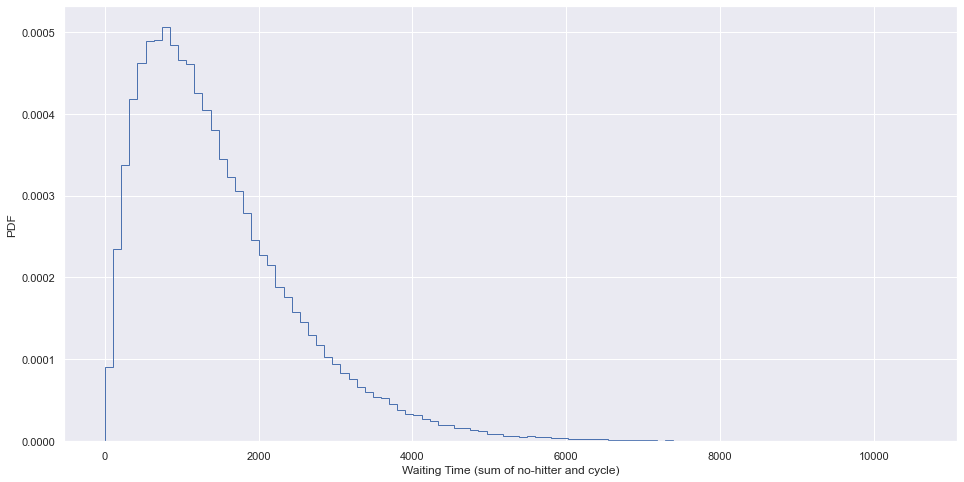

In [147]:
# Draw 100,000 samples of waiting times for observing a no-hitter and a hitting of the cycle
waiting_times = successive_poisson(764, 715, size=100000)

# Make the histogram
plt.figure(figsize=(16,8))
plt.hist(waiting_times, bins=100, density=True, histtype='step')

# Label axes
plt.xlabel('Waiting Time (sum of no-hitter and cycle)')
plt.ylabel('PDF')

# Show the plot
plt.show()